### Install


In [15]:
%pip install pandas
%pip install catboost
%pip install scikit-learn
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached torch-2.6.0-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.

In [83]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import seaborn as sns

# [Base Repo](https://git.codenrock.com/siam-ml-hack-1359/cnrprod1740766582-team-83332/zagruzka-koda-proekta-6529)

read this

# Data

[Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/data.zip) as Data/data/_ \
[Markup Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/markup_train.csv) as Data/markup_train.csv \
[High Qualiti Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/hq_markup_train.csv) as Data/hq_markup_train.csv \
[Test Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/validation%201.zip) as Data/validation 1/_ \

install all of this


In [89]:
hq_train_data_path = "./Data/hq_markup_train.csv"
lq_train_data_path = "./Data/markup_train.csv"


hq_train_data = pd.read_csv(hq_train_data_path)


bin_features = ['Некачественное ГДИС',	'Влияние ствола скважины',	'Радиальный режим',	'Линейный режим',	'Билинейный режим',	'Сферический режим',	'Граница постоянного давления',	'Граница непроницаемый разлом']
value_features = [f + '_details' for f in bin_features[1:]]

# Данные

X - временной ряд(находится в файле по имени `train_data['file_name'])`). Представляет из себя 3 значение(время, ΔP (атм) P′ (атм)) \
Y - 15 признаков, 8 биномиальные а 7 их численная характеристика на графике. \
Более подробно читайте в репе


In [18]:
hq_train_data

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
0,e9c7e07f-b723-4da3-918e-7dbcb360c830,department2,user5,0,1,1,0,0,0,0,1,2.082030,0.109087,NaN,NaN,NaN,NaN,4.647373
1,726565c9-e05b-4a28-9079-22d94f9bb9e2,department3,user4,0,1,1,1,0,0,0,0,2.714919,1.220888,1.353544,NaN,NaN,NaN,NaN
2,c2a4d43d-5a93-4c37-81b6-d4fdc5b0280b,department3,user5,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15e04219-9fa0-401d-8b42-833b71ccafb3,department3,user5,0,1,1,0,0,0,0,0,1.909838,1.569424,NaN,NaN,NaN,NaN,NaN
4,d43f459d-97fa-4ab0-bacc-43e2cb73e1b9,department1,user1,0,1,1,1,0,0,0,0,1.298287,1.140658,0.387881,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,a0448188-be5d-4ad6-929f-1870710e224b,department3,user4,0,1,1,0,0,1,0,0,2.127852,0.127861,NaN,NaN,0.774477,NaN,NaN
496,c295e7be-009c-4893-94c0-194d449077ed,department2,user5,0,1,1,0,0,0,1,0,3.084138,-0.304834,NaN,NaN,NaN,50.469566,NaN
497,ac06114e-e466-497a-a0b7-5166d784140e,department2,user5,0,1,0,0,0,0,0,1,0.009126,NaN,NaN,NaN,NaN,NaN,122.084111
498,0fd9d92c-a6d6-44c2-80b2-7f3cfcbea3da,department3,user5,0,1,1,0,1,0,1,0,2.328356,1.640163,NaN,1.291103,NaN,292.072213,NaN


<Axes: >

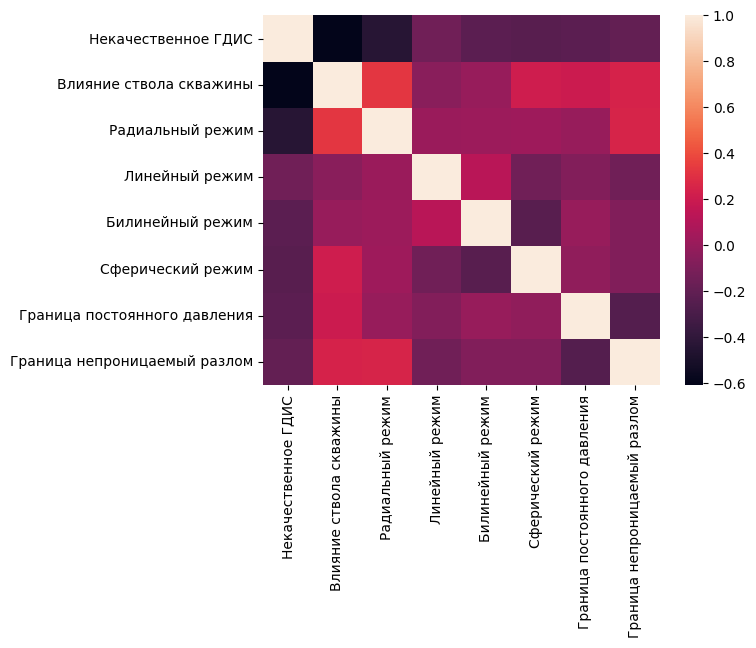

In [ ]:
bin_corr = hq_train_data[bin_features].corr()
sns.heatmap(bin_corr,
            xticklabels=bin_corr.columns.values,
            yticklabels=bin_corr.columns.values)

<Axes: >

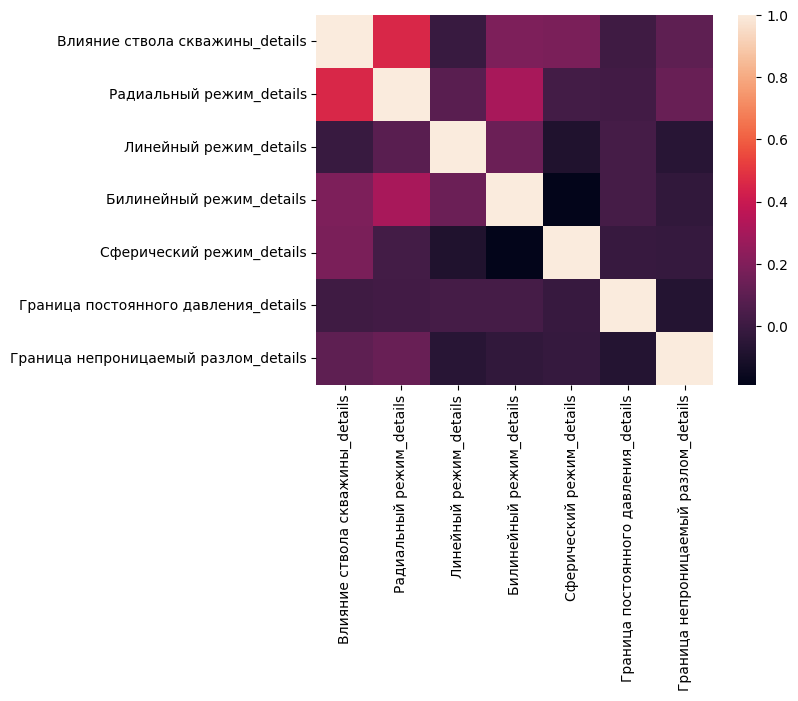

In [90]:

bin_corr = hq_train_data[value_features].fillna(-1).corr()
sns.heatmap(bin_corr,
            xticklabels=bin_corr.columns.values,
            yticklabels=bin_corr.columns.values)

In [ ]:
def get_train_data(file_name: str, train=True) -> pd.DataFrame | None:
    """
    Загружает данные из файла с указанным UUID в DataFrame

    Параметры:
    uuid (str): Идентификатор файла
    data_dir (str): Путь к папке с данными (по умолчанию 'data')

    Возвращает:
    pd.DataFrame: DataFrame с колонками ['Time', 'DeltaP', 'P_prime']
    или None если файл не найден
    """
    if train:
        file_path = os.path.join("Data/data", file_name)
    else:
        file_path = os.path.join("Data/validation 1", file_name)
    try:
        df = pd.read_csv(
            file_path,
            sep="\t",
            header=None,
            names=["Time", "DeltaP", "P_prime"],
            dtype={"Time": "float32", "DeltaP": "float32", "P_prime": "float32"},
            engine="c",
        )
        return df
    except FileNotFoundError as x:
        print(f"File not found in path:\t {file_path}\n" + x)
        return None

def get_train_data_from_loc(loc:pd.Series, train=True)->pd.DataFrame | None:
    return get_train_data(loc['file_name'])

# print(get_train_data('e9c7e07f-b723-4da3-918e-7dbcb360c830')) # work
# print(get_train_data_from_loc(hq_train_data.iloc[1])) # work

          Time     DeltaP   P_prime
0     0.008333   0.569484  1.008254
1     0.016667   1.740885  2.376161
2     0.025000   2.863874  3.191803
3     0.033333   3.866621  3.746968
4     0.041667   4.754902  4.123827
..         ...        ...       ...
177  11.608334  16.501825  2.558318
178  11.883333  16.540350  2.599306
179  12.158334  16.578636  2.636903
180  12.441667  16.617558  2.675358
181  12.733334  16.657030  2.718663

[182 rows x 3 columns]
          Time      DeltaP    P_prime
0     0.000137    0.010783   1.777265
1     0.020137    8.882369  13.893935
2     0.030137   14.878979  10.931179
3     0.050137   17.910307   5.991131
4     0.070137   19.929394   6.945928
..         ...         ...        ...
177  30.920137  106.087029  16.037609
178  31.920137  106.521034  16.376270
179  32.920135  107.023788  16.575186
180  33.920135  107.488792  17.133892
181  34.920135  108.071068  14.852910

[182 rows x 3 columns]


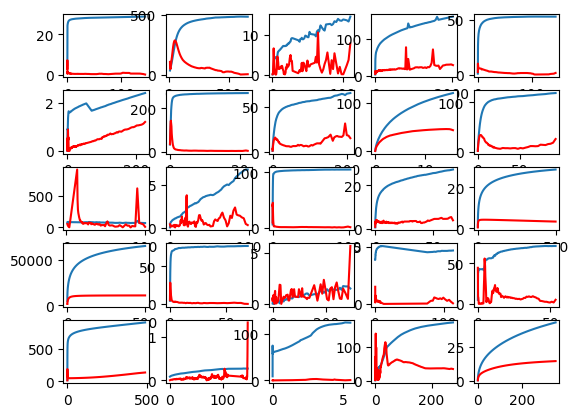

In [ ]:
# Show some time series


subplot = (5, 5)
random_rows = hq_train_data.sample(n=subplot[0] * subplot[1], random_state=42)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 
for i, v in enumerate(series):
    plt.subplot(*subplot, i+1)
    plt.plot(v['Time'], v['DeltaP'])
    plt.plot(v['Time'], v['P_prime'], color='r')
plt.show()

In [21]:
# is each series is same length?
random_rows = hq_train_data.sample(n=3, random_state=42)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 
for s in series:
    print(s)
    print(s['Time'].describe())
# No need to standardize

           Time     DeltaP   P_prime
0      0.002778   4.789663  3.107884
1      0.005556   6.943874  6.343817
2      0.008333  10.283549  5.104697
3      0.011111  11.112785  4.850453
4      0.013889  12.535733  6.678874
..          ...        ...       ...
331  131.455551  28.683897  0.592375
332  134.488892  28.694868  0.592987
333  137.591660  28.709370  0.467822
334  140.766663  28.720343  0.365373
335  144.013885  28.729748  0.149852

[336 rows x 3 columns]
count    336.000000
mean      18.955341
std       32.053493
min        0.002778
25%        0.411111
50%        3.105556
75%       21.288888
max      144.013885
Name: Time, dtype: float64
           Time      DeltaP     P_prime
0      9.200314   37.626522  108.884567
1      9.833647   40.956516   60.519806
2     11.300314   50.946507   55.195992
3     11.866981   51.821541   54.617664
4     12.533647   53.814678   58.250004
..          ...         ...         ...
122  558.550293  482.776489   16.193865
123  571.450317  483.3112

### Временные ряды представлены в разном формате, с разной длинной и распределением
#### Попробуим их стандартизировать что бы потом обучит модельку

In [25]:
def standardize_series(original_df:pd.DataFrame, n_points:int=256)->pd.DataFrame:
    # Нормализация временной оси к диапазону [0, 1]
    time_normalized = (original_df['Time'] - original_df['Time'].min()) / (original_df['Time'].max() - original_df['Time'].min())
    
    # Создание новой равномерной временной сетки
    new_time = np.linspace(0, 1, n_points)
    
    # Интерполяция для каждой колонки
    interpolated_data = {}
    for column in ['DeltaP', 'P_prime']:
        interp_fn = interp1d(time_normalized, 
                            original_df[column], 
                            kind='linear',  # Можно изменить на 'quadratic' или 'cubic'
                            fill_value='extrapolate')
        interpolated_data[column] = interp_fn(new_time)
    
    # Создание нового датафрейма
    new_df = pd.DataFrame({
        'Time': np.linspace(original_df['Time'].min(), 
                          original_df['Time'].max(), 
                          n_points),
        'DeltaP': interpolated_data['DeltaP'],
        'P_prime': interpolated_data['P_prime']
    })
    
    return new_df

for s in series:
    ss = standardize_series(s)
    # print(ss)
    print(ss['Time'].describe())

count    256.000000
mean      72.008332
std       41.816890
min        0.002778
25%       36.005555
50%       72.008332
75%      108.011109
max      144.013885
Name: Time, dtype: float64
count    256.000000
mean     334.258635
std      188.776106
min        9.200314
25%      171.729474
50%      334.258635
75%      496.787795
max      659.316956
Name: Time, dtype: float64
count    256.000000
mean      55.567090
std       31.983823
min        0.493341
25%       28.030215
50%       55.567090
75%       83.103964
max      110.640839
Name: Time, dtype: float64


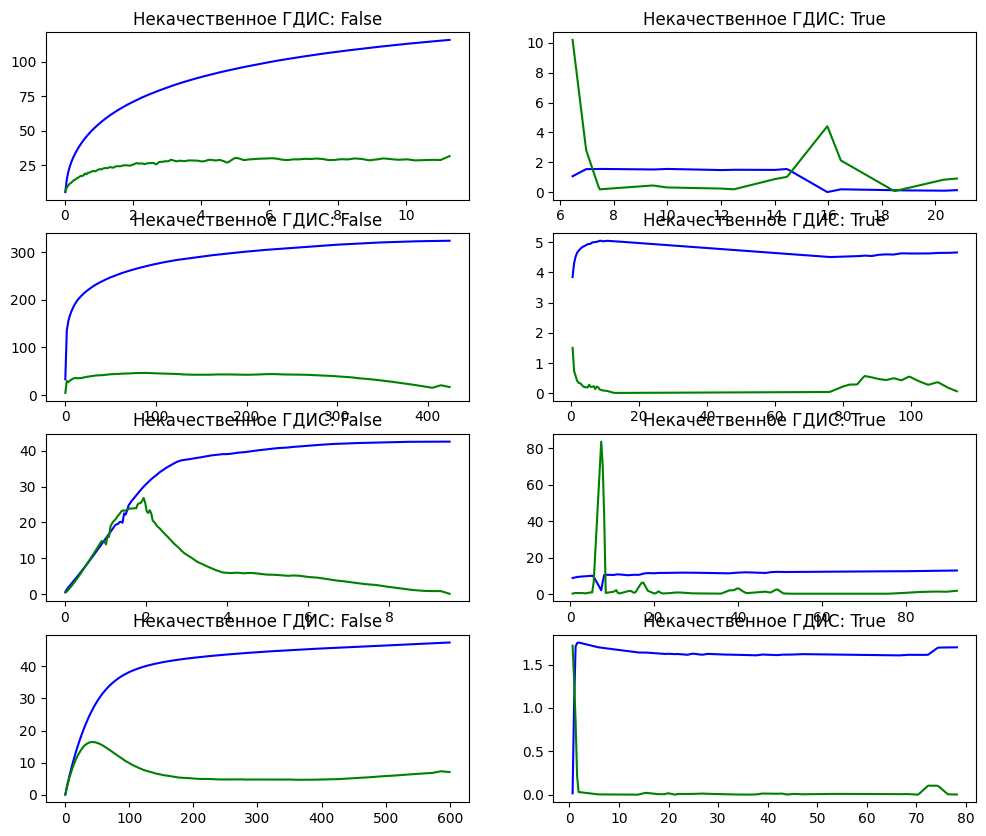

In [98]:
# TODO show series for first target(Некачественное ГДИС)
random_rows = hq_train_data.sample(n=400, random_state=120)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 

fig, ax = plt.subplots(4, 2, figsize = (12, 10) )
hq_train_data_t = random_rows[['file_name', 'Некачественное ГДИС']]
target0 = hq_train_data_t[hq_train_data_t['Некачественное ГДИС'] == 0]
target1 = hq_train_data_t[hq_train_data_t['Некачественное ГДИС'] == 1]
for i, v in enumerate(target0.iloc):
    if i > 3:
        break
    ss = standardize_series(get_train_data_from_loc(v))
    ax[i, 0].plot(ss['Time'], ss['DeltaP'], color='b')
    ax[i, 0].plot(ss['Time'], ss['P_prime'], color='g')
    ax[i, 0].set_title('Некачественное ГДИС: False')

for i, v in enumerate(target1.iloc):
    if i > 3:
        break
    ss = standardize_series(get_train_data_from_loc(v))
    ax[i, 1].plot(ss['Time'], ss['DeltaP'], color='b')
    ax[i, 1].plot(ss['Time'], ss['P_prime'], color='g')
    ax[i, 1].set_title('Некачественное ГДИС: True')
plt.show()


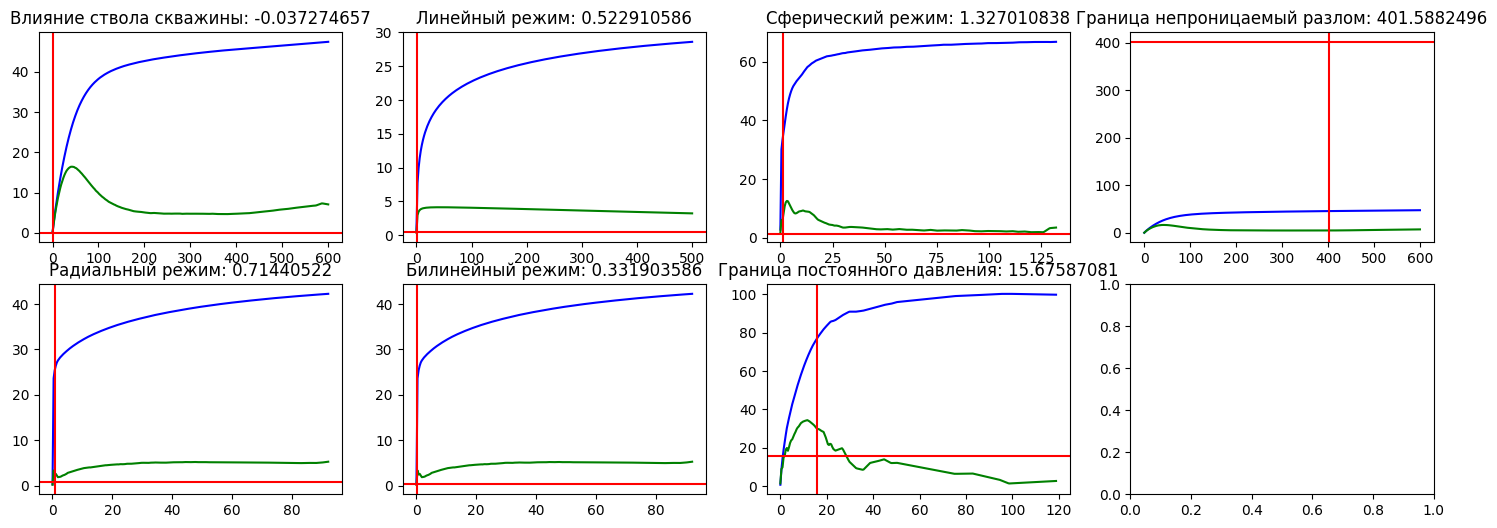

In [93]:
# for all target show where it is true
random_rows = hq_train_data.sample(n=100, random_state=45)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 

fig, ax = plt.subplots(2, 4, figsize= (18, 6))
hq_train_data_t = random_rows.drop(["department_name", "user_name"], axis=1)
for i, t in enumerate(hq_train_data_t.columns[2:9]):
    target = hq_train_data_t[['file_name', t, t+'_details']].dropna().iloc[0]
    ss = standardize_series(get_train_data_from_loc(target))
    ii = (i%2, i//2)
    ax[ii].plot(ss['Time'], ss['DeltaP'], color='b')
    ax[ii].plot(ss['Time'], ss['P_prime'], color='g')
    ax[ii].axvline(x=target[t+'_details'], color='r')
    ax[ii].axhline(y=target[t+'_details'], color='r')
    ax[ii].set_title(f'{t}: {target[t+'_details']}')


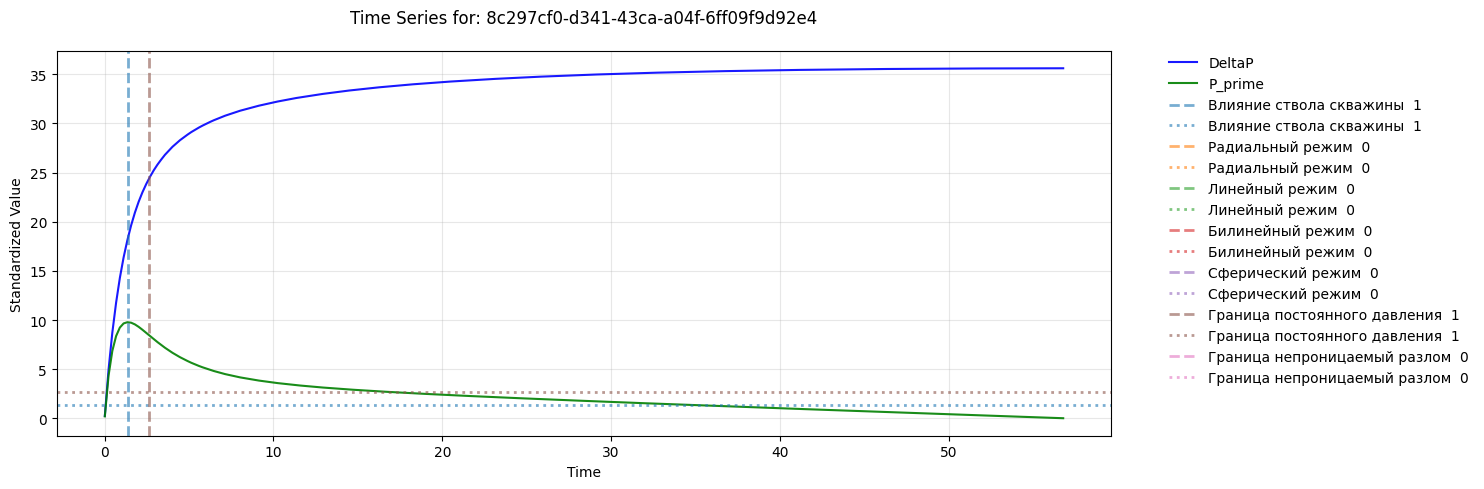

In [112]:
# show all target lines(if have) in one series
single_case = hq_train_data.sample(n=1, random_state=78).iloc[0]

# Получаем и стандартизируем данные
raw_series = get_train_data_from_loc(single_case)
standardized_series = standardize_series(raw_series)

# Создаем график
fig, ax = plt.subplots(figsize=(15, 5))

# Рисуем временные ряды
ax.plot(standardized_series['Time'], standardized_series['DeltaP'], 
        color='b', alpha=0.9, label='DeltaP')
ax.plot(standardized_series['Time'], standardized_series['P_prime'], 
        color='g', alpha=0.9, label='P_prime')

# Определяем целевые признаки (исключая служебные колонки)
targets = [col for col in single_case.index 
          if not col.endswith('_details') 
          and col not in ['file_name', 'department_name', 'user_name']][1:]

# Создаем палитру цветов
colors = plt.cm.tab10.colors

# Рисуем линии для каждого признака
for i, target in enumerate(targets):
    if pd.notna(single_case[target]):
        detail_value = single_case[f'{target}_details']
        t = single_case[target]
        
        # Выбираем цвет из палитры
        color = colors[i % len(colors)]
        
        # Вертикальная линия (временная метка)
        ax.axvline(detail_value, color=color, linestyle='--', 
                 linewidth=2, alpha=0.6, label=f'{target}  {t}')
        
        # Горизонтальная линия (значение признака)
        ax.axhline(detail_value, color=color, linestyle=':', 
                 linewidth=2, alpha=0.6, label=f'{target}  {t}')


# Добавляем элементы оформления
ax.set_title(f"Time Series for: {single_case['file_name']}", pad=20)
ax.set_xlabel('Time')
ax.set_ylabel('Standardized Value')
ax.grid(alpha=0.3)

# Выносим легенду за пределы графика
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
        borderaxespad=0., frameon=False)

plt.tight_layout()
plt.show()

In [ ]:
# TODO 
model = 'magic'